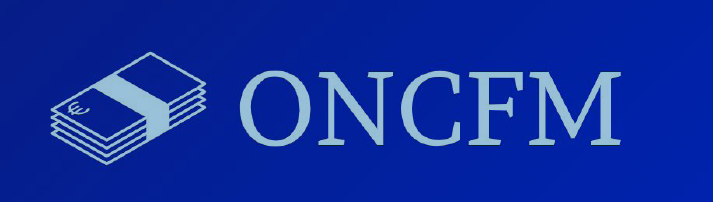

In [1]:
import math
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence
from statsmodels.stats.diagnostic import normal_ad, kstest_fit, het_breuschpagan, het_white

from functions import *

col = findColor('blue.png')

## 1 - Import des donnees & verifications

In [2]:
# Import data
billets = pd.read_csv('billets.csv', sep=';', encoding='latin_1')
billets.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


#### La variable is_genuine est booleenne, les 6 autres variables sont quantitatives continues.
#### Les billets ne sont pas identifies par un numero de serie ou autre identifiant, au besoin on pourra utiliser leur index dans le dataframe comme cle primaire artificielle.

In [3]:
billets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


Les differentes variables apparaissent correctement typees.

In [4]:
billets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


#### Les valeurs minimum de toutes les variables sont positives. Les maxima sont relativement proches des moyennes, dont a priori il s'agit de valeurs atypiques et non aberrantes. L'influence de ces valeurs sera analysee plus loin.

<AxesSubplot:>

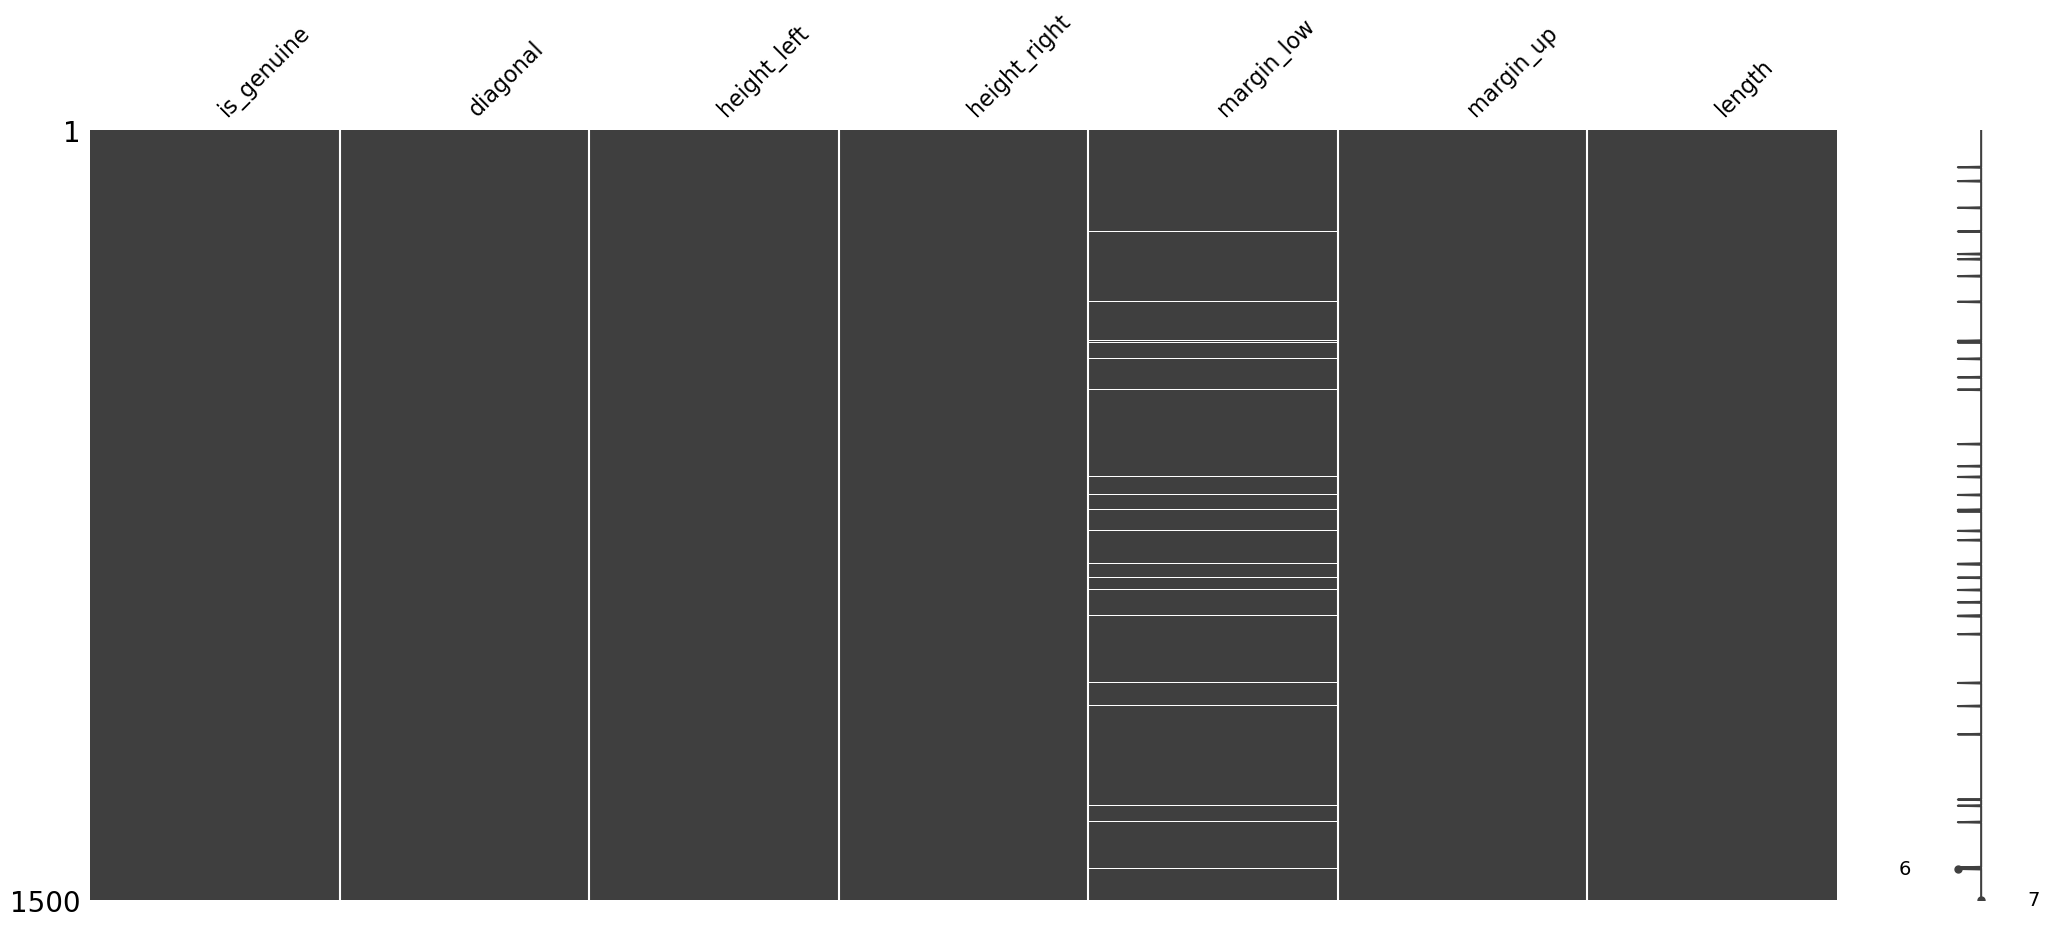

In [5]:
msno.matrix(billets)

In [6]:
# identidy lines where margin_low data is missing
missing_data = billets.loc[billets['margin_low'].isna() == True]
missing_data.head(missing_data.shape[0])

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
72,True,171.94,103.89,103.45,NaN,3.25,112.79
99,True,171.93,104.07,104.18,NaN,3.14,113.08
151,True,172.07,103.80,104.38,NaN,3.02,112.93
197,True,171.45,103.66,103.80,NaN,3.62,113.27
241,True,171.83,104.14,104.06,NaN,3.02,112.36
251,True,171.80,103.26,102.82,NaN,2.95,113.22
284,True,171.92,103.83,103.76,NaN,3.23,113.29
334,True,171.85,103.70,103.96,NaN,3.00,113.36
410,True,172.56,103.72,103.51,NaN,3.12,112.95
413,True,172.30,103.66,103.50,NaN,3.16,112.95


In [7]:
missing_data['is_genuine'].value_counts()

True     29
False     8
Name: is_genuine, dtype: int64

#### La colonne margin_low comporte 37 valeurs manquantes (pour 29 vrais et 8 faux billets) qu'il faudra completer.

In [8]:
# check for duplicates
billets.duplicated().sum()

0

#### Le fichier ne comporte pas de lignes dupliquees.

## 2 - Regression lineaire multiple

### 2.1 - Regression lineaire simple

In [9]:
# create dataframe without missing data
billets_trim = billets.loc[billets['margin_low'].isna() == False]

#### 2.1.1 - Regression

In [10]:
# perform linear regression to complete margin_low column
y_reglin = billets_trim['margin_low']
x_reglin = billets_trim[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
x_reglin = sm.add_constant(x_reglin, prepend=True, has_constant='skip')
reg_multi_reglin = sm.OLS(endog=y_reglin, exog=x_reglin).fit()
print(reg_multi_reglin.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          2.60e-202
Time:                        07:36:22   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.9948      9.656      2.382   

#### Toutes les variables sont significatives (p-values inferieures a 5%).
#### La probabilite de la F-statistic est tres proche de zero, ce qui indique que notre modele est significatif (i.e. on peut rejeter l'hypothese nulle H0 que tous les coefficients sont egaux a zero puisque la probabilite de la F-statistic est inferieure au seuil alpha = 5%).
#### Le R2 et le R2 ajuste sont faibles (< 0.5), ce qui indique cependant une qualite de prevision mediocre.
#### Le Cond.No. indique un probleme de colinearite potentiel.

In [11]:
# calculate Variance Inflation Factor each variable
vif_reglin = pd.DataFrame()
variables_reglin = reg_multi_reglin.model.exog
vif_reglin["variable"] = ['diagonal', 'height_left', 'height_right', 'margin_up', 'length']
vif_reglin["vi_factor"] = [variance_inflation_factor(variables_reglin, i) for i in np.arange(1, variables_reglin.shape[1])]
vif_reglin.to_csv('vif_reglin.csv', index=False, encoding='latin_1')
vif_reglin

,variable,vi_factor
0,diagonal,1.013613
1,height_left,1.138261
2,height_right,1.230115
3,margin_up,1.404404
4,length,1.576950


#### Tous les VIFs sont inferieurs a 10, on peut donc exclure un probleme de multi-colinearite des variables.

In [12]:
billets_trim_reg = billets_trim.copy()
billets_trim_reg['margin_low_reglin'] = reg_multi_reglin.predict()
billets_trim_reg['residus_reglin'] = reg_multi_reglin.resid
billets_trim_reg.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,margin_low_reglin,residus_reglin
0,True,171.81,104.86,104.95,4.52,2.89,112.83,4.788676,-0.268676
1,True,171.46,103.36,103.66,3.77,2.99,113.09,4.138908,-0.368908
2,True,172.69,104.48,103.50,4.40,2.94,113.16,4.125933,0.274067
3,True,171.36,103.91,103.94,3.62,3.01,113.51,4.156580,-0.536580
4,True,171.73,104.28,103.46,4.04,3.48,112.54,4.577425,-0.537425


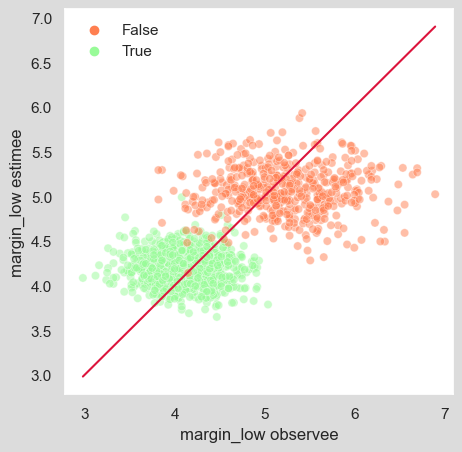

In [13]:
# plot adjusted values against observed values
sns.set(rc={'figure.figsize':(5,5),'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
X_plot = [billets_trim_reg['margin_low'].min(), billets_trim_reg['margin_low'].max()]

ax = sns.scatterplot(x="margin_low", y="margin_low_reglin", data=billets_trim_reg, hue='is_genuine', alpha=0.5,
                     palette=['coral','palegreen'])
ax.set(xlabel='margin_low observee', ylabel='margin_low estimee')
plt.plot(X_plot, X_plot, color='crimson')
plt.legend(title='', frameon=False)
plt.savefig('margin_low_e_reglin.png')
plt.show()

La droite rouge est la première bissectrice. Si la regression etait parfaite, les valeurs  ajustees et observees seraient egales (residus nuls) et tous les points seraient alignes sur la premiere bissectrice d'equation y=x.
On note une dispersion apparemment plus grande des faux billets autour de la premiere bissectrice, indiquant des residus plus grands pour ces billets.

#### 2.1.2 - Analyse des residus

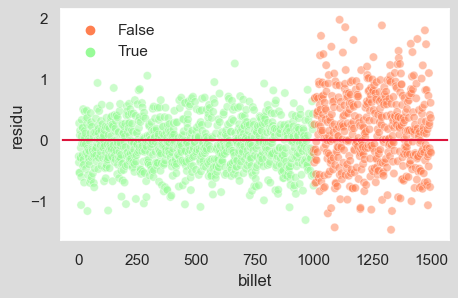

In [14]:
# scatterplot residues
sns.set(rc={'figure.figsize':(5,3),'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
ax = sns.scatterplot(x=billets_trim_reg.index, y=billets_trim_reg['residus_reglin'],
                     data=billets_trim_reg, hue='is_genuine', palette=['coral', 'palegreen'], alpha=0.5)
ax.set(xlabel='billet', ylabel='residu')
plt.legend(title='', frameon=False)
plt.axhline(0, color='crimson')
plt.savefig('scatter_residus_reglin.png')
plt.show()

On n'observe pas vraiment de "cone", meme si les residus semblent s'eloigner davantage de 0 vers la droite du graphe ou sont representes les faux billets.

##### 2.1.2.1 - Moyenne

In [15]:
billets_trim_reg['residus_reglin'].mean()

7.229881613266433e-14

#### La moyenne des residus est tres proche de 0.

##### 2.1.2.2 - Homoscedasticite

In [16]:
# Breusch-Pagan test
lm_bp, lm_pval_bp, f_val_bp, f_pval_bp = het_breuschpagan(reg_multi_reglin.resid, variables_reglin)
print('Lagrange multiplier statistic:', lm_bp)
print('p-value Lagrange multiplier statistic:', lm_pval_bp)

Lagrange multiplier statistic: 80.16261280174568
p-value Lagrange multiplier statistic: 7.759535216213152e-16


La p-valeur de la statistique de test du multiplicateur de Lagrange est inferieure à  5%, on rejette l'hypothese H0 du test de Breusch-Pagan selon laquelle les variances des residus sont constantes, nous avons suffisamment d'information pour conclure a l'heteroscedasticite des residus.

In [17]:
# White test
lm_w, lm_pval_w, f_val_w, f_pval_w = het_white(reg_multi_reglin.resid, variables_reglin)
print('Lagrange multiplier statistic:', lm_w)
print('p-value Lagrange multiplier statistic:', lm_pval_w)

Lagrange multiplier statistic: 109.86015196870964
p-value Lagrange multiplier statistic: 2.08282449893771e-14


La p-valeur de la statistique de test du multiplicateur de Lagrange est inferieure à  5%, on rejette l'hypothese H0 du test de White selon laquelle les variances des residus sont constantes, nous avons suffisamment d'information pour conclure a l'heteroscedasticite des residus.

##### 2.1.2.3 - Normalite

In [18]:
st.shapiro(reg_multi_reglin.resid)

ShapiroResult(statistic=0.9857882857322693, pvalue=8.540482210328548e-11)

La p-value est inferieure a 5%, donc on rejette H0, les residus ne sont pas normaux, mais leur observation, le fait que leur moyenne soit tres proche de zero et que l'echantillon soit de taille suffisante (superieure a 30) permettent de dire que les resultats obtenus par le modele lineaire ne sont pas absurdes, meme si les residus ne sont pas normaux.

In [19]:
n = billets_trim_reg.shape[0]
print("Nombre d'observations:", n)

# calculate first quartile
Q1 = np.percentile(billets_trim_reg['residus_reglin'], 25)
print("Premier quartile:", Q1)

# calculate third quartile
Q3 = np.percentile(billets_trim_reg['residus_reglin'], 75)
print("Troisieme quartile:", Q3)

# calculate interquartile range
IQ = Q3 - Q1
print("Interquartile range:", IQ)

# calculate bin width for histogram (Freedman-Diaconis rule)
bin_width = 2*((IQ)/np.cbrt(n))
print("Largeur des bins:", bin_width)

# calculate number of bins for histogram
maxi = billets_trim_reg['residus_reglin'].max()
mini = billets_trim_reg['residus_reglin'].min()
nb_bins = ((maxi - mini) / bin_width).astype(int)
print("Nombre de bins:", nb_bins)

Nombre d'observations: 1463
Premier quartile: -0.31707379085598886
Troisieme quartile: 0.2735289696570371
Interquartile range: 0.590602760513026
Largeur des bins: 0.10405046518377314
Nombre de bins: 33


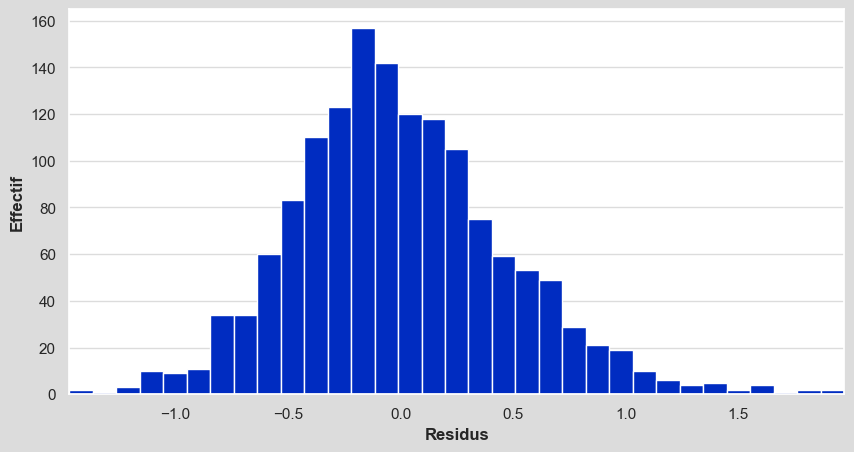

In [20]:
# analyse residues with histogram
sns.set(rc={'figure.figsize':(10, 5), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph3 = plt.hist(billets_trim_reg['residus_reglin'], bins=nb_bins, color=col)
plt.xlim([mini, maxi])
plt.xlabel('Residus', fontweight='bold', fontsize='12')
plt.ylabel('Effectif', fontweight='bold', fontsize='12')
plt.grid(axis='y', color='gainsboro')
plt.savefig("hist_reglin.png", bbox_inches='tight')

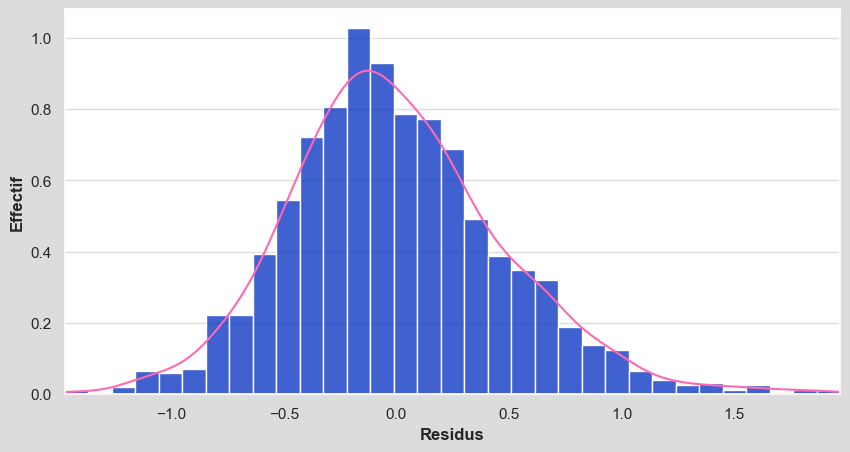

In [21]:
sns.set(rc={'figure.figsize':(10, 5), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph3b = sns.histplot(billets_trim_reg['residus_reglin'], bins=nb_bins, kde=False, color=col, stat='density')
sns.kdeplot(data=billets_trim_reg, x='residus_reglin', color='hotpink')
plt.xlim([mini, maxi])
plt.xlabel('Residus', fontweight='bold', fontsize='12')
plt.ylabel('Effectif', fontweight='bold', fontsize='12')
plt.grid(axis='y', color='gainsboro')
plt.savefig("histplot_kde_reglin.png", bbox_inches='tight')

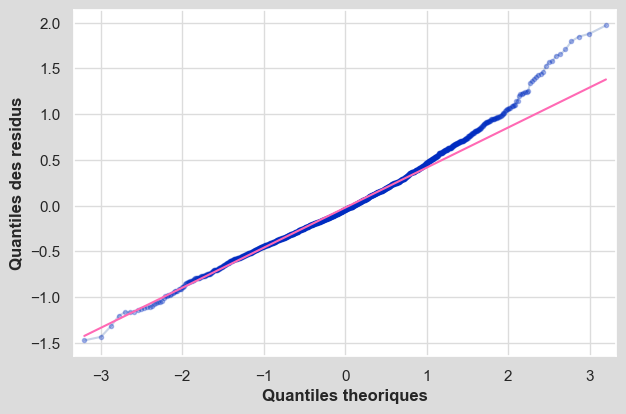

In [22]:
# analyse residues with a QQ plot
fig, ax = plt.subplots(1, figsize=(7, 4.5))
graph4 = sm.qqplot(billets_trim_reg['residus_reglin'], marker='.', markerfacecolor=col,
                   markeredgecolor=col, alpha=0.3, line="q", linestyle='solid', ax=ax)
plt.xlabel("Quantiles theoriques", fontweight='bold', fontsize=12)
plt.ylabel("Quantiles des residus", fontweight='bold', fontsize=12)
ax.get_lines()[1].set_color("hotpink")
plt.grid(axis='both', color='gainsboro')
plt.savefig("qq_reglin.png", bbox_inches='tight')
plt.show()

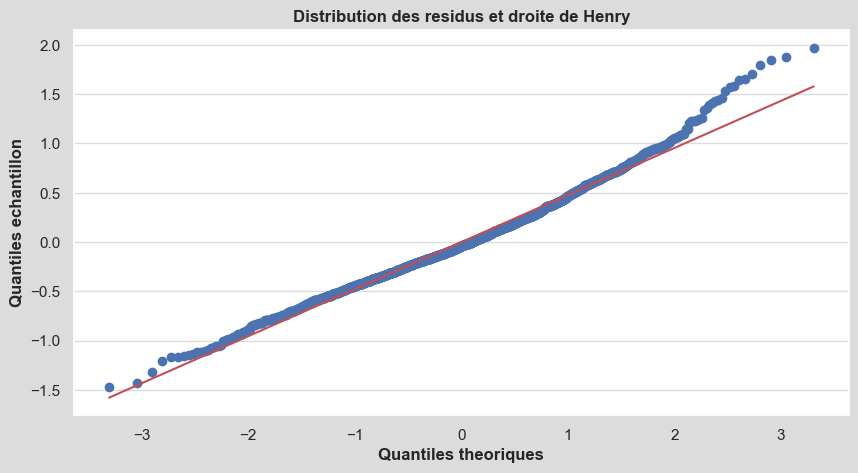

In [23]:
# droite de Henry
fig, ax = plt.subplots()
graph5 = st.probplot(billets_trim_reg['residus_reglin'], dist="norm", plot=ax)
ax.set_title("Distribution des residus et droite de Henry", fontname='Arial', fontsize=12, fontweight='bold')
plt.xlabel('Quantiles theoriques', fontweight='bold', fontsize='12')
plt.ylabel('Quantiles echantillon', fontweight='bold', fontsize='12')
plt.grid(axis='y', color='gainsboro')
plt.savefig("henry_reglin.png", bbox_inches='tight')
plt.show()

#### Sur le QQ plot comme la droite de Henry, on note un "decollement" des queues de distribution des residus, particulierement a droite.

In [24]:
# Anderson-Darling test on residues
print(st.anderson(billets_trim_reg['residus_reglin'], dist="norm"))

AndersonResult(statistic=4.85502724639673, critical_values=array([0.574, 0.654, 0.785, 0.916, 1.089]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [25]:
stat, p = normal_ad(billets_trim_reg['residus_reglin'], axis=0)
print("Anderson-Darling statistic:", stat)
print("p-value:", p)

Anderson-Darling statistic: 4.85502724639673
p-value: 5.114137678791534e-12


#### Les hypothèses du test d'Anderson-Darling sont les suivantes :
#### H0 : les données suivent une distribution spécifiée
#### H1 : les données ne suivent pas une distribution spécifiée
#### Utilisez la valeur de p correspondante (si disponible) pour vérifier si les données proviennent de la distribution choisie. Si la valeur de p est inférieure à alpha (généralement 0,05 ou 0,10), rejetez l'hypothèse nulle qui suppose que les données proviennent de cette distribution.
#### source: https://support.minitab.com/fr-fr/minitab/20/help-and-how-to/statistics/basic-statistics/supporting-topics/normality/the-anderson-darling-statistic/
#### Ici encore, on rejette donc l'hypothese H0 de normalite des residus.

In [26]:
# Lilliefors (Kolmogorov-Smirnov) normality test for mu and sigma unknown
stat_reglin, p_reglin = kstest_fit(billets_trim_reg['residus_reglin'], dist='norm', pvalmethod='table')
print("Kolmogorov-Smirnov statistic:", stat_reglin)
print("p-value:", p_reglin)

Kolmogorov-Smirnov statistic: 0.04278096997570213
p-value: 0.0009999999999998899


#### Ici encore on rejette H0, les residus ne sont pas normalement distribues.

#### Aucun des tests effectues ne permet de conclure a la normalite des residus de la regression lineaire simple, qui en outre met en evidence un eventuel probleme de multicollinearite (Cond. No. tres eleve).
#### Une regression ridge semble indiquee dans ce cas. Par souci de completude, nous etudierons egalement les resultats de la regressions lasso et eventuellement elastic net en fonction des resultats.

#### 2.1.3 - Analyse des outliers

##### 2.1.3.1 - Individus atypiques et influents

In [27]:
billets_trim_reg.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,margin_low_reglin,residus_reglin
0,True,171.81,104.86,104.95,4.52,2.89,112.83,4.788676,-0.268676
1,True,171.46,103.36,103.66,3.77,2.99,113.09,4.138908,-0.368908
2,True,172.69,104.48,103.50,4.40,2.94,113.16,4.125933,0.274067
3,True,171.36,103.91,103.94,3.62,3.01,113.51,4.156580,-0.536580
4,True,171.73,104.28,103.46,4.04,3.48,112.54,4.577425,-0.537425


In [28]:
# create data
stud_res = reg_multi_reglin.get_influence().resid_studentized_external  # calculate studentized residues
dist_cook, pval_cook = reg_multi_reglin.get_influence().cooks_distance  # calculate Cook distance
dffits, pval_dffits = reg_multi_reglin.get_influence().dffits  # calculate influence of observations
lvg = reg_multi_reglin.get_influence().hat_matrix_diag  # diagonal of the hat matrix for ordinary least squares method

# store data in dataframe
billets_trim_reg_2 = pd.concat([billets_trim_reg[['is_genuine', 'diagonal', 'height_left', 'height_right', 'margin_low',
                               'margin_up', 'length', 'margin_low_reglin', 'residus_reglin']],
                                reg_multi_reglin.get_influence().summary_frame()], axis=1)
billets_trim_reg_2.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,margin_low_reglin,residus_reglin,dfb_const,...,dfb_height_left,dfb_height_right,dfb_margin_up,dfb_length,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,True,171.81,104.86,104.95,4.52,2.89,112.83,4.788676,-0.268676,0.038028,...,-0.040676,-0.050650,0.028339,-0.018016,0.000894,-0.563593,0.016606,-0.073239,-0.563461,-0.073221
1,True,171.46,103.36,103.66,3.77,2.99,113.09,4.138908,-0.368908,-0.047734,...,0.040802,0.006819,0.006051,0.006096,0.000597,-0.769710,0.006015,-0.059874,-0.769603,-0.059866
2,True,172.69,104.48,103.50,4.40,2.94,113.16,4.125933,0.274067,-0.028752,...,0.027975,-0.020340,-0.010975,-0.001295,0.000457,0.572488,0.008298,0.052367,0.572356,0.052355
3,True,171.36,103.91,103.94,3.62,3.01,113.51,4.156580,-0.536580,-0.031981,...,0.001406,-0.016400,0.006425,-0.029579,0.000936,-1.118681,0.004467,-0.074934,-1.118778,-0.074940
4,True,171.73,104.28,103.46,4.04,3.48,112.54,4.577425,-0.537425,-0.025618,...,-0.027128,0.056039,-0.049448,-0.009670,0.001171,-1.121058,0.005558,-0.083813,-1.121157,-0.083821


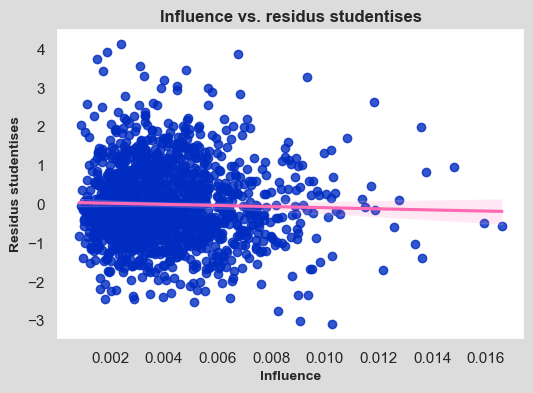

In [29]:
# plot influence vs studentised residues
sns.set(rc={'figure.figsize':(6, 4), 'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph5 = sns.regplot(x='hat_diag', y='student_resid', data=billets_trim_reg_2, scatter_kws={"color":col},
                     line_kws={"color":"hotpink"})
plt.xlabel('Influence', fontweight='bold', fontsize=10)
plt.ylabel('Residus studentises', fontweight='bold', fontsize=10)
plt.title('Influence vs. residus studentises', fontweight='bold', fontsize=12)
plt.savefig('stud_res_influence.png')
plt.show()

In [30]:
# overview of Studentised residues
print ("Residus studentises\n", billets_trim_reg_2['student_resid'].describe())

Residus studentises
 count    1463.000000
mean        0.000133
std         1.001419
min        -3.087577
25%        -0.660578
50%        -0.086814
75%         0.570403
max         4.127099
Name: student_resid, dtype: float64


In [31]:
# identification of outliers
outliers = billets_trim_reg_2.loc[abs(billets_trim_reg_2['student_resid']) > 2]

# check if outliers influence is above threshold using leverage cutoff
# threshold = (2k+2)/n where k is the number of variables and n is the number of observations
threshold = ((2 * (len(x_reglin.columns) - 1) + 2) / billets_trim_reg_2.shape[0])
influents_2 = billets_trim_reg_2.loc[billets_trim_reg_2['hat_diag'] > threshold]

# cross outliers and influent banknotes
influent_outliers_2 =pd.merge(outliers, influents_2, left_index=True, right_index=True)

In [32]:
print("Il y a", outliers.shape[0], "billets atypiques dans le dataset.")
print("Il y a ", influents_2.shape[0], "billets influents dans le dataset.")
print("Il y a ", influent_outliers_2.shape[0], "billets atypiques et influents dans le dataset.")

Il y a 72 billets atypiques dans le dataset.
Il y a  75 billets influents dans le dataset.
Il y a  7 billets atypiques et influents dans le dataset.


##### 2.1.3.2 - Regression lineaire sans les individus atypiques et influents

In [33]:
billets_trim_3 = billets_trim.drop(influent_outliers_2.index)
billets_trim_3.shape

(1456, 7)

In [34]:
# perform linear regression to complete margin_low column
y_reglin_2 = billets_trim_3['margin_low']
x_reglin_2 = billets_trim_3[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
x_reglin_2 = sm.add_constant(x_reglin_2, prepend=True, has_constant='skip')
reg_multi_reglin_2 = sm.OLS(endog=y_reglin_2, exog=x_reglin_2).fit()
print(reg_multi_reglin_2.summary())

                            OLS Regression Results                            
Dep. Variable:             margin_low   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     282.2
Date:                Tue, 27 Jun 2023   Prob (F-statistic):          5.39e-211
Time:                        07:36:31   Log-Likelihood:                -972.21
No. Observations:                1456   AIC:                             1956.
Df Residuals:                    1450   BIC:                             1988.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           24.2866      9.516      2.552   

##### 2.1.3.4 - Analyse des residus de la regression sans individus atypiques influents

In [35]:
# calculate residues
margin_low_ai = reg_multi_reglin_2.predict(x_reglin_2)
billets_trim_3['margin_low_ai'] = margin_low_ai
billets_trim_3['residus_ai'] = billets_trim_3['margin_low_ai'] - billets_trim_3['margin_low']
billets_trim_3.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,margin_low_ai,residus_ai
0,True,171.81,104.86,104.95,4.52,2.89,112.83,4.794173,0.274173
1,True,171.46,103.36,103.66,3.77,2.99,113.09,4.133400,0.363400
2,True,172.69,104.48,103.50,4.40,2.94,113.16,4.122230,-0.277770
3,True,171.36,103.91,103.94,3.62,3.01,113.51,4.155756,0.535756
4,True,171.73,104.28,103.46,4.04,3.48,112.54,4.593061,0.553061


In [36]:
# mean residue
billets_trim_3['residus_ai'].mean()

-3.6642849926488204e-14

In [37]:
# Breusch-Pagan test for homoscedasticity
lm_bp_ai, lm_pval_bp_ai, f_val_bp_ai, f_pval_bp_ai = het_breuschpagan(billets_trim_3['residus_ai'], x_reglin_2)
print('Lagrange multiplier statistic:', lm_bp_ai)
print('p-value Lagrange multiplier statistic:', lm_pval_bp_ai)

Lagrange multiplier statistic: 74.98436229043651
p-value Lagrange multiplier statistic: 9.37312023326823e-15


La p-valeur de la statistique de test du multiplicateur de Lagrange est inferieure à  5%, on rejette l'hypothese H0 du test de Breusch-Pagan selon laquelle les variances des residus sont constantes, nous avons suffisamment d'information pour conclure a l'heteroscedasticite des residus.

In [38]:
# Shapiro test for normality
st.shapiro(billets_trim_3['residus_ai'])

ShapiroResult(statistic=0.9853686690330505, pvalue=5.723389470690954e-11)

La p-value est inferieure a 5%, donc on rejette H0, les residus ne sont pas normaux, mais leur observation, le fait que leur moyenne soit tres proche de zero et que l'echantillon soit de taille suffisante (superieure a 30) permettent de dire que les resultats obtenus apres elimination des valeurs atypiques et influentes ne sont pas absurdes, meme si les residus ne sont pas normaux. Cependant, ils ne permettent pas d'ameliorer significativment les resultats de la regression lineaire multiple.

#### Le R2 varie peu apres elimination des valeurs atypiques et influentes (0.493 contre 0.477) et les coefficients de regression varient peu. Les residus ne sont toujorus ni Gaussiens, ni homoscedastiques. En outre, le nombre de billets atypiques et influents est faible (7 sur 1463) et on peut donc en conclure que leur influence sur les resultats de la regression lineaire est suffisemment faible pour que leur elimination ne constitue pas une amelioration significative du modele, ce qui valide statistiquement notre intuition initiale de les conserver dans l'analyse.

### 2.2 - Regression ridge

#### 2.2.1 - Regression

In [39]:
# select data
y_ridge_cv = billets_trim['margin_low']
x_ridge_cv = billets_trim[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
alphas = [0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1]

In [40]:
# perform ridge regression
ridge_cv = RidgeCV(alphas=alphas, fit_intercept=True, scoring=None, cv=None, gcv_mode='auto', store_cv_values=True,
                   alpha_per_target=False)
ridge_reg = ridge_cv.fit(x_ridge_cv, y_ridge_cv)

# print results
print("cv values:", ridge_reg.cv_values_)
print("mean cv values:", np.mean(ridge_cv.cv_values_, axis=0))
print("alpha:", ridge_cv.alpha_)
print("const:", ridge_cv.intercept_)
print("weight vector:", ridge_cv.coef_)
print("nb endog:", ridge_cv.n_features_in_)
print("base estimator score:", ridge_cv.best_score_)
print("names endog:", ridge_cv.feature_names_in_)

cv values: [[0.07464567 0.07464566 0.0746456  ... 0.07457285 0.07428156 0.07391749]
 [0.13774488 0.13774488 0.13774494 ... 0.13780821 0.13806082 0.13837501]
 [0.07637518 0.07637518 0.07637512 ... 0.07630915 0.07604665 0.07572212]
 ...
 [0.37298655 0.37298656 0.37298664 ... 0.37307482 0.37342644 0.37386276]
 [0.13121926 0.13121927 0.13121934 ... 0.13129933 0.13161788 0.13201223]
 [0.04398647 0.04398646 0.04398643 ... 0.04395177 0.04381389 0.04364352]]
mean cv values: [0.23215509 0.23215509 0.23215509 0.23215507 0.23215494 0.23215358
 0.23214773 0.23214087]
alpha: 1.0
const: 23.124484382535734
weight vector: [-0.1102964   0.18326792  0.25596266  0.25309142 -0.40945886]
nb endog: 5
base estimator score: -0.2321408704284659
names endog: ['diagonal' 'height_left' 'height_right' 'margin_up' 'length']


#### Rappel des resultats de la regression lineaire multiple:

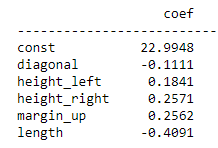

Plus l'alpha de la regression ridge est important, plus la penalisation est importante et plus le resultat de la regression (poids affectes aux differentes variables) differe de celui d'une regression lineaire multiple. Ici, alpha vaut 1 et les poids des affectes aux differentes variables sont egaux a ceux de la regression lineaire multiple jusqu'a la 2eme decimale (3eme decimale pour la longueur).

In [41]:
margin_low_ridge = ridge_reg.predict(x_ridge_cv)
score = ridge_reg.score(x_ridge_cv, y_ridge_cv)
mse = mean_squared_error(y_ridge_cv, margin_low_ridge)
print("R2:{0:.3f}, Mean Squared Error (MSE):{1:.2f}, Mean Squared Error Sqrt (RMSE):{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.477, Mean Squared Error (MSE):0.23, Mean Squared Error Sqrt (RMSE):0.48


Le R2 n'est pas significativement plus eleve que celui de la regression lineaire multiple.

In [42]:
# billets_trim_reg['margin_low_ridge'] = ridge_reg.predict(x_ridge_cv)
billets_trim_reg['margin_low_ridge'] = margin_low_ridge
score = ridge_reg.score(x_ridge_cv, y_ridge_cv)
mse = mean_squared_error(y_ridge_cv, margin_low_ridge)
print("R2:{0:.3f}, Mean Squared Error (MSE):{1:.2f}, Mean Squared Error Sqrt (RMSE):{2:.2f}"
      .format(score, mse, np.sqrt(mse)))
billets_trim_reg['residus_ridge'] = billets_trim_reg['margin_low_ridge'] - billets_trim_reg['margin_low']
billets_trim_reg.head()

R2:0.477, Mean Squared Error (MSE):0.23, Mean Squared Error Sqrt (RMSE):0.48


,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,margin_low_reglin,residus_reglin,margin_low_ridge,residus_ridge
0,True,171.81,104.86,104.95,4.52,2.89,112.83,4.788676,-0.268676,4.787405,0.267405
1,True,171.46,103.36,103.66,3.77,2.99,113.09,4.138908,-0.368908,4.139765,0.369765
2,True,172.69,104.48,103.50,4.40,2.94,113.16,4.125933,0.274067,4.127090,-0.272910
3,True,171.36,103.91,103.94,3.62,3.01,113.51,4.156580,-0.536580,4.156350,0.536350
4,True,171.73,104.28,103.46,4.04,3.48,112.54,4.577425,-0.537425,4.576616,0.536616


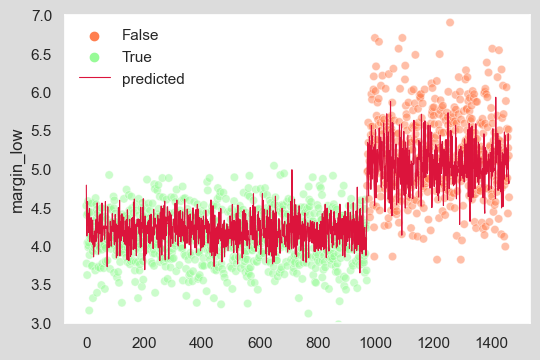

In [43]:
# scatterplot predicted values vs original values
sns.set(rc={'figure.figsize':(6, 4),'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph9 = sns.scatterplot(x=range(len(x_ridge_cv)), y=y_ridge_cv, alpha=0.5,
                          hue=billets_trim_reg['is_genuine'], palette=['coral','palegreen'])
plt.plot(range(len(x_ridge_cv)), margin_low_ridge, lw=0.8, color="crimson", label="predicted")
plt.legend(title='', frameon=False)
ax.set(xlabel='billet', ylabel='margin_low')
plt.ylim(3, 7)
plt.savefig('margin_low_e_ridge.png')
plt.show()

On observe ici encore des residus plus variables sur les faux billets.

#### 2.2.2 - Analyse des residus

In [44]:
# mean residue
billets_trim_reg['residus_ridge'].mean()

6.1753594567256825e-15

La moyenne des residus est tres proche de zero.

In [45]:
# Breusch-Pagan test for homoscedasticity
lm_bp_r, lm_pval_bp_r, f_val_bp_r, f_pval_bp_r = het_breuschpagan(billets_trim_reg['residus_ridge'], variables_reglin)
print('Lagrange multiplier statistic:', lm_bp_r)
print('p-value Lagrange multiplier statistic:', lm_pval_bp_r)

Lagrange multiplier statistic: 80.16639690374548
p-value Lagrange multiplier statistic: 7.745402558980247e-16


La p-valeur de la statistique de test du multiplicateur de Lagrange est inferieure à  5%, on rejette l'hypothese H0 du test de Breusch-Pagan selon laquelle les variances des residus sont constantes, nous avons suffisamment d'information pour conclure a l'heteroscedasticite des residus.

In [46]:
# Shapiro test for normality
st.shapiro(billets_trim_reg['residus_ridge'])

ShapiroResult(statistic=0.985718846321106, pvalue=7.883056707402858e-11)

La p-value est inferieure a 5%, donc on rejette H0, les residus ne sont pas normaux, mais leur observation, le fait que leur moyenne soit tres proche de zero et que l'echantillon soit de taille suffisante (superieure a 30) permettent de dire que les resultats obtenus par le modele ridge ne sont pas absurdes, meme si les residus ne sont pas normaux. Cependant, ils ne permettent pas d'ameliorer significativment les resultats de la regression lineaire multiple.

### 2.3 - Regression lasso

#### 2.3.1 - Regression

In [47]:
# select data
y_lasso_cv = billets_trim['margin_low']
x_lasso_cv = billets_trim[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]

In [48]:
# perform lasso regression
lasso_cv = LassoCV(eps=0.001, n_alphas=100, alphas=alphas, fit_intercept=True, precompute='auto',  max_iter=1000, tol=0.0001,
                   copy_X=True, cv=None, verbose=False, n_jobs=None, positive=False, random_state=None, selection='cyclic')
lasso_reg = lasso_cv.fit(x_lasso_cv, y_lasso_cv)

# print results
print("MSE path;", lasso_reg.mse_path_)
print("alpha:", lasso_reg.alpha_)
print("dual gap:", lasso_reg.dual_gap_)
print("nb iterations:", lasso_reg.n_iter_)
print("const:", lasso_reg.intercept_)
print("weight vector:", lasso_reg.coef_)
print("nb endog:", ridge_reg.n_features_in_)
print("names endog:", ridge_reg.feature_names_in_)

MSE path; [[0.30009836 0.3257853  0.32065717 0.73249065 1.13686396]
 [0.30009836 0.3257853  0.32065717 0.73249065 1.13686396]
 [0.15823388 0.16983464 0.16970641 0.40188626 0.64157194]
 [0.1500596  0.1526748  0.14813189 0.35265839 0.459324  ]
 [0.15259126 0.15037583 0.14996131 0.34268317 0.43364512]
 [0.15321938 0.1504507  0.15052753 0.34190275 0.43077539]
 [0.15328601 0.15046161 0.15058783 0.34182953 0.43048205]
 [0.1532926  0.15046274 0.15059395 0.34182226 0.43045293]]
alpha: 1e-06
dual gap: 8.096634971317689e-07
nb iterations: 12
const: 22.99513713791545
weight vector: [-0.11104887  0.18411291  0.25713132  0.25616882 -0.40910668]
nb endog: 5
names endog: ['diagonal' 'height_left' 'height_right' 'margin_up' 'length']


In [49]:
margin_low_lasso = lasso_reg.predict(x_lasso_cv)
score = lasso_reg.score(x_lasso_cv, y_lasso_cv)
mse = mean_squared_error(y_lasso_cv, margin_low_lasso)
print("R2:{0:.3f}, Mean Squared Error (MSE):{1:.2f}, Mean Squared Error Sqrt (RMSE):{2:.2f}"
      .format(score, mse, np.sqrt(mse)))

R2:0.477, Mean Squared Error (MSE):0.23, Mean Squared Error Sqrt (RMSE):0.48


Ici encore, la regression Lasso n'apporte pas d'amelioration significative du R2 par rapport a la regression lineaire multiple.

In [50]:
billets_trim_reg['margin_low_lasso'] = lasso_reg.predict(x_lasso_cv)
billets_trim_reg['residus_lasso'] = billets_trim_reg['margin_low_lasso'] - billets_trim_reg['margin_low']
billets_trim_reg.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length,margin_low_reglin,residus_reglin,margin_low_ridge,residus_ridge,margin_low_lasso,residus_lasso
0,True,171.81,104.86,104.95,4.52,2.89,112.83,4.788676,-0.268676,4.787405,0.267405,4.788665,0.268665
1,True,171.46,103.36,103.66,3.77,2.99,113.09,4.138908,-0.368908,4.139765,0.369765,4.138912,0.368912
2,True,172.69,104.48,103.50,4.40,2.94,113.16,4.125933,0.274067,4.127090,-0.272910,4.125941,-0.274059
3,True,171.36,103.91,103.94,3.62,3.01,113.51,4.156580,-0.536580,4.156350,0.536350,4.156574,0.536574
4,True,171.73,104.28,103.46,4.04,3.48,112.54,4.577425,-0.537425,4.576616,0.536616,4.577418,0.537418


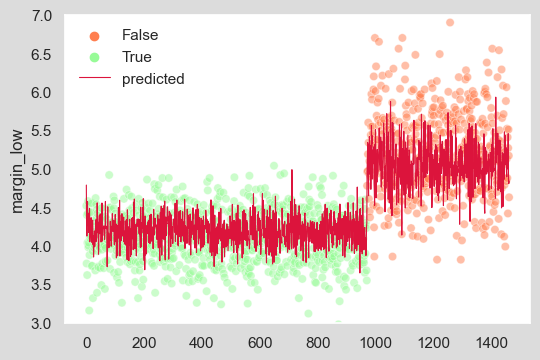

In [51]:
# scatterplot predicted values vs original values
sns.set(rc={'figure.figsize':(6,4),'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph9 = sns.scatterplot(x=range(len(x_lasso_cv)), y=y_lasso_cv,
                     data=billets_trim_reg, alpha=0.5, hue='is_genuine', palette=['coral','palegreen'])
plt.plot(range(len(x_lasso_cv)), margin_low_lasso, lw=0.8, color="crimson", label="predicted")
plt.legend(title='', frameon=False)
ax.set(xlabel='billet', ylabel='margin_low')
plt.ylim(3, 7)
plt.savefig('margin_low_e_lasso.png')
plt.show()

On observe ici encore des residus plus variables sur les faux billets.

#### 2.3.2 - Analyse des residus

In [52]:
# mean residue
billets_trim_reg['residus_lasso'].mean()

-1.7338602642949813e-15

La moyenne des residus est tres proche de zero.

In [53]:
# Breusch-Pagan test for homoscedasticity
lm_bp_l, lm_pval_bp_l, f_val_bp_l, f_pval_bp_l = het_breuschpagan(billets_trim_reg['residus_lasso'], variables_reglin)
print('Lagrange multiplier statistic:', lm_bp_l)
print('p-value Lagrange multiplier statistic:', lm_pval_bp_l)

Lagrange multiplier statistic: 80.16274157243085
p-value Lagrange multiplier statistic: 7.759053867341048e-16


La p-valeur de la statistique de test du multiplicateur de Lagrange est inferieure à  5%, on rejette l'hypothese H0 du test de Breusch-Pagan selon laquelle les variances des residus sont constantes, nous avons suffisamment d'information pour conclure a l'heteroscedasticite des residus.

In [54]:
# Shapiro test for normality
st.shapiro(billets_trim_reg['residus_lasso'])

ShapiroResult(statistic=0.9857873320579529, pvalue=8.531198664174511e-11)

La p-value est inferieure a 5%, donc on rejette H0, les residus ne sont pas normaux, mais leur observation, le fait que leur moyenne soit tres proche de zero et que l'echantillon soit de taille suffisante (superieure a 30) permettent de dire que les resultats obtenus par le modele ridge ne sont pas absurdes, meme si les residus ne sont pas normaux. Cependant, ils ne permettent pas d'ameliorer significativment les resultats de la regression lineaire simple.

## Le resultat des regressions ridge et lasso ne permettant pas d'ameliorer significativement celui de la regression lineaire multiple non-penalisee, nous poursuivrons l'analyse avec les resultats de celle-ci, bien que les residus soient heteroscedastiques et non-gaussiens.

# 4 - Creation du fichier .csv complet

In [55]:
# add column of 1s
billets = sm.add_constant(billets, prepend=True, has_constant='skip')

# fill in missing margin_low values with regression prediction
billets.loc[(billets['margin_low'].isna() == True), 'margin_low'] = reg_multi_reglin.predict(billets[['const','diagonal',
                                                                                                      'height_left',
                                                                                                      'height_right',
                                                                                                      'margin_up', 'length']])
# remove column of 1s
billets_final = billets.drop('const', axis=1)
billets_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1500 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [56]:
# display basic statistics
billets_final.describe(include='all')

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN
top,True,NaN,NaN,NaN,NaN,NaN,NaN
freq,1000,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,171.958440,104.029533,103.920307,4.483475,3.151473,112.67850
std,NaN,0.305195,0.299462,0.325627,0.659632,0.231813,0.87273
min,NaN,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,NaN,171.750000,103.820000,103.710000,4.020000,2.990000,112.03000
50%,NaN,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,NaN,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000


In [57]:
# re-check for duplicates
dup_final = billets_final.duplicated().value_counts()
dup_final

False    1500
dtype: int64

<AxesSubplot:>

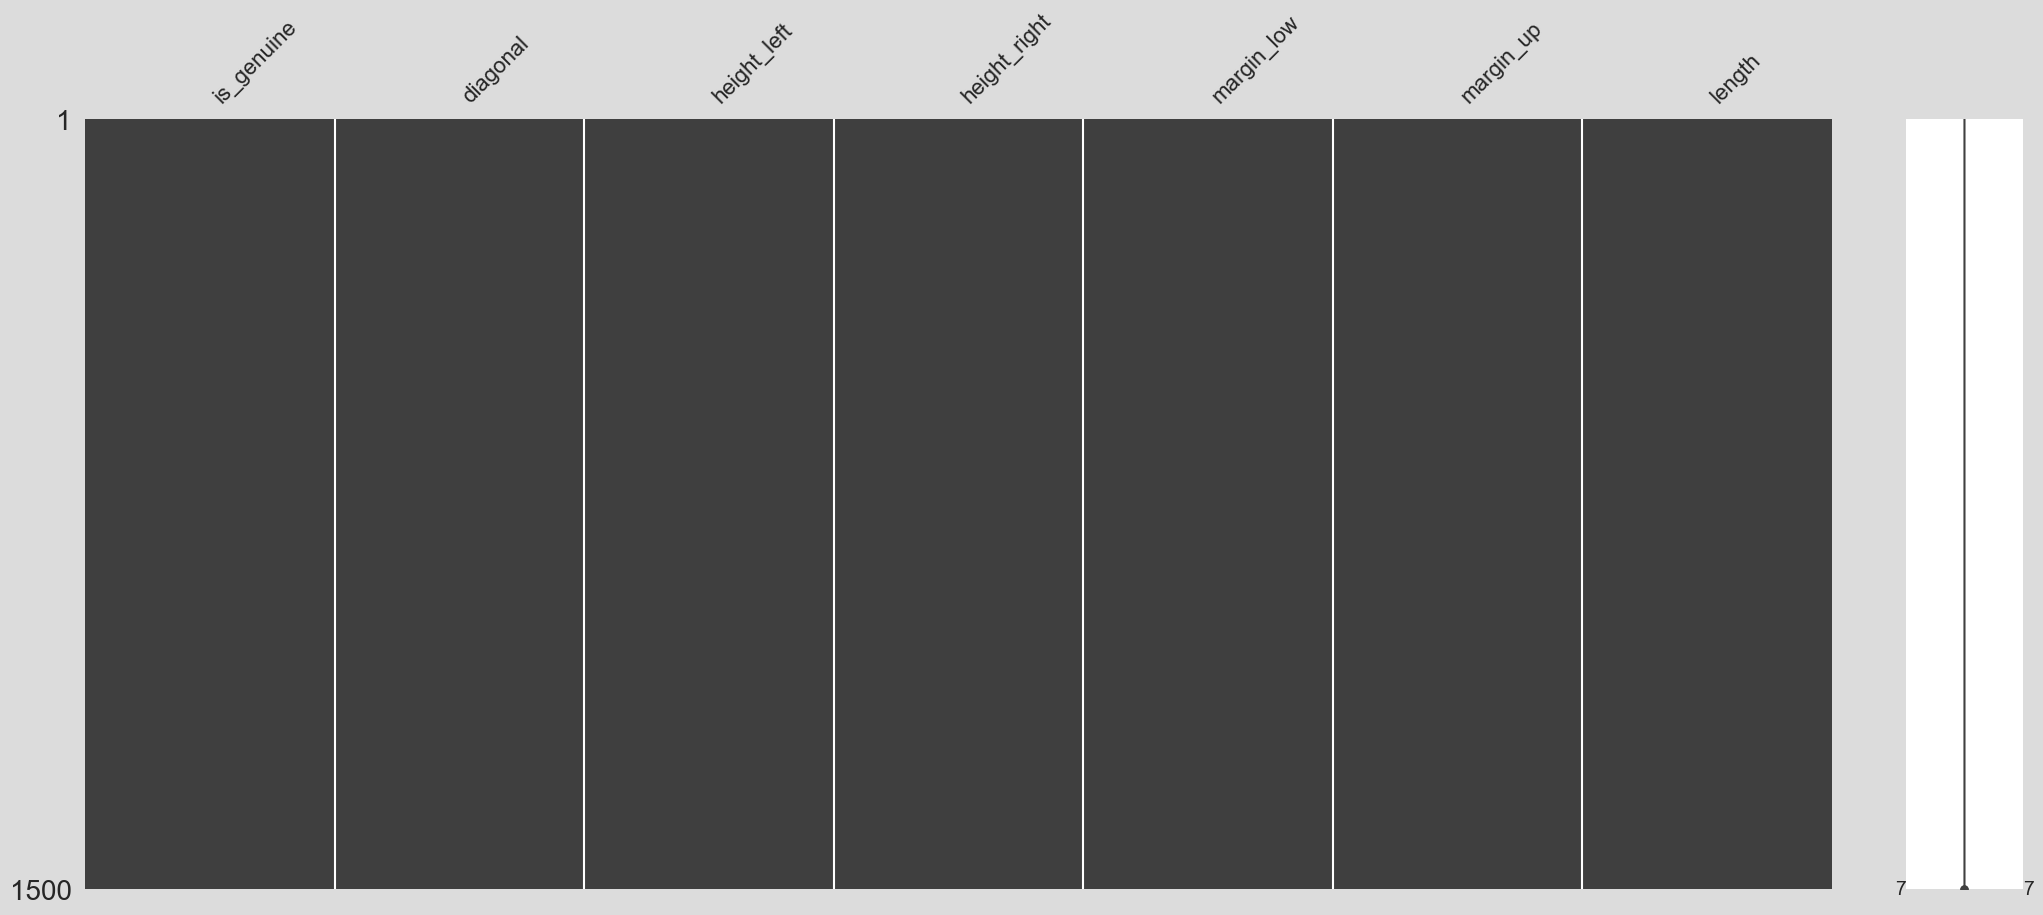

In [58]:
# re-check for missing values
msno.matrix(billets_final)

In [59]:
billets_final.to_csv('billets_final.csv', index=False, encoding='latin_1')

# 3 - Etude des correlations entre les variables

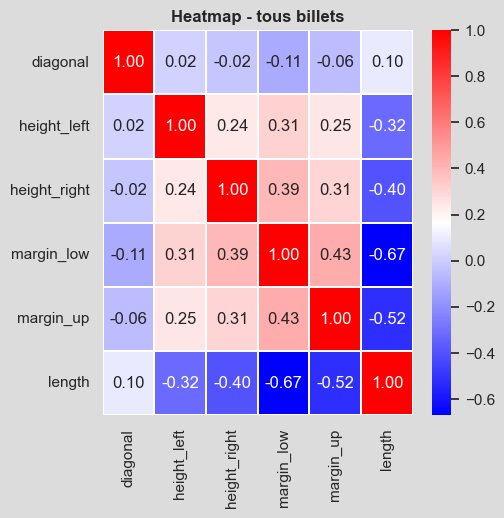

In [60]:
# plot heatmap to check correlations between variables
fig, ax = plt.subplots(figsize=(5, 5))
heatmap = sns.heatmap(billets_final[['diagonal', 'height_left', 'height_right', 'margin_low',
                      'margin_up', 'length']].corr(), annot=True, cmap="bwr", fmt="0.2f", linewidth=0.05)
plt.title("Heatmap - tous billets", fontweight='bold', fontsize=12)
plt.savefig("heatmap_billets_final.png", bbox_inches='tight', pad_inches=0.5)
plt.show()

In [61]:
# calculate Pearson Coefficient for length and margin_low
st.pearsonr(billets_final['length'], billets_final['margin_low'])

PearsonRResult(statistic=-0.6709660250173902, pvalue=8.000603408722084e-197)

In [62]:
# calculate Pearson Coefficient for length and margin_low
st.pearsonr(billets_final['length'], billets_final['margin_up'])

PearsonRResult(statistic=-0.5205751349009689, pvalue=6.031895221729516e-105)

In [63]:
# calculate Pearson Coefficient for length and margin_low
st.pearsonr(billets_final['margin_low'], billets_final['margin_up'])

PearsonRResult(statistic=0.43423721290326756, pvalue=5.09818870445899e-70)

La longueur des billets apparait significativement correlee (p-value de la statistique de Pearson proche de 0) a un certain nombre d'autres dimensions, et en particulier margin_low.

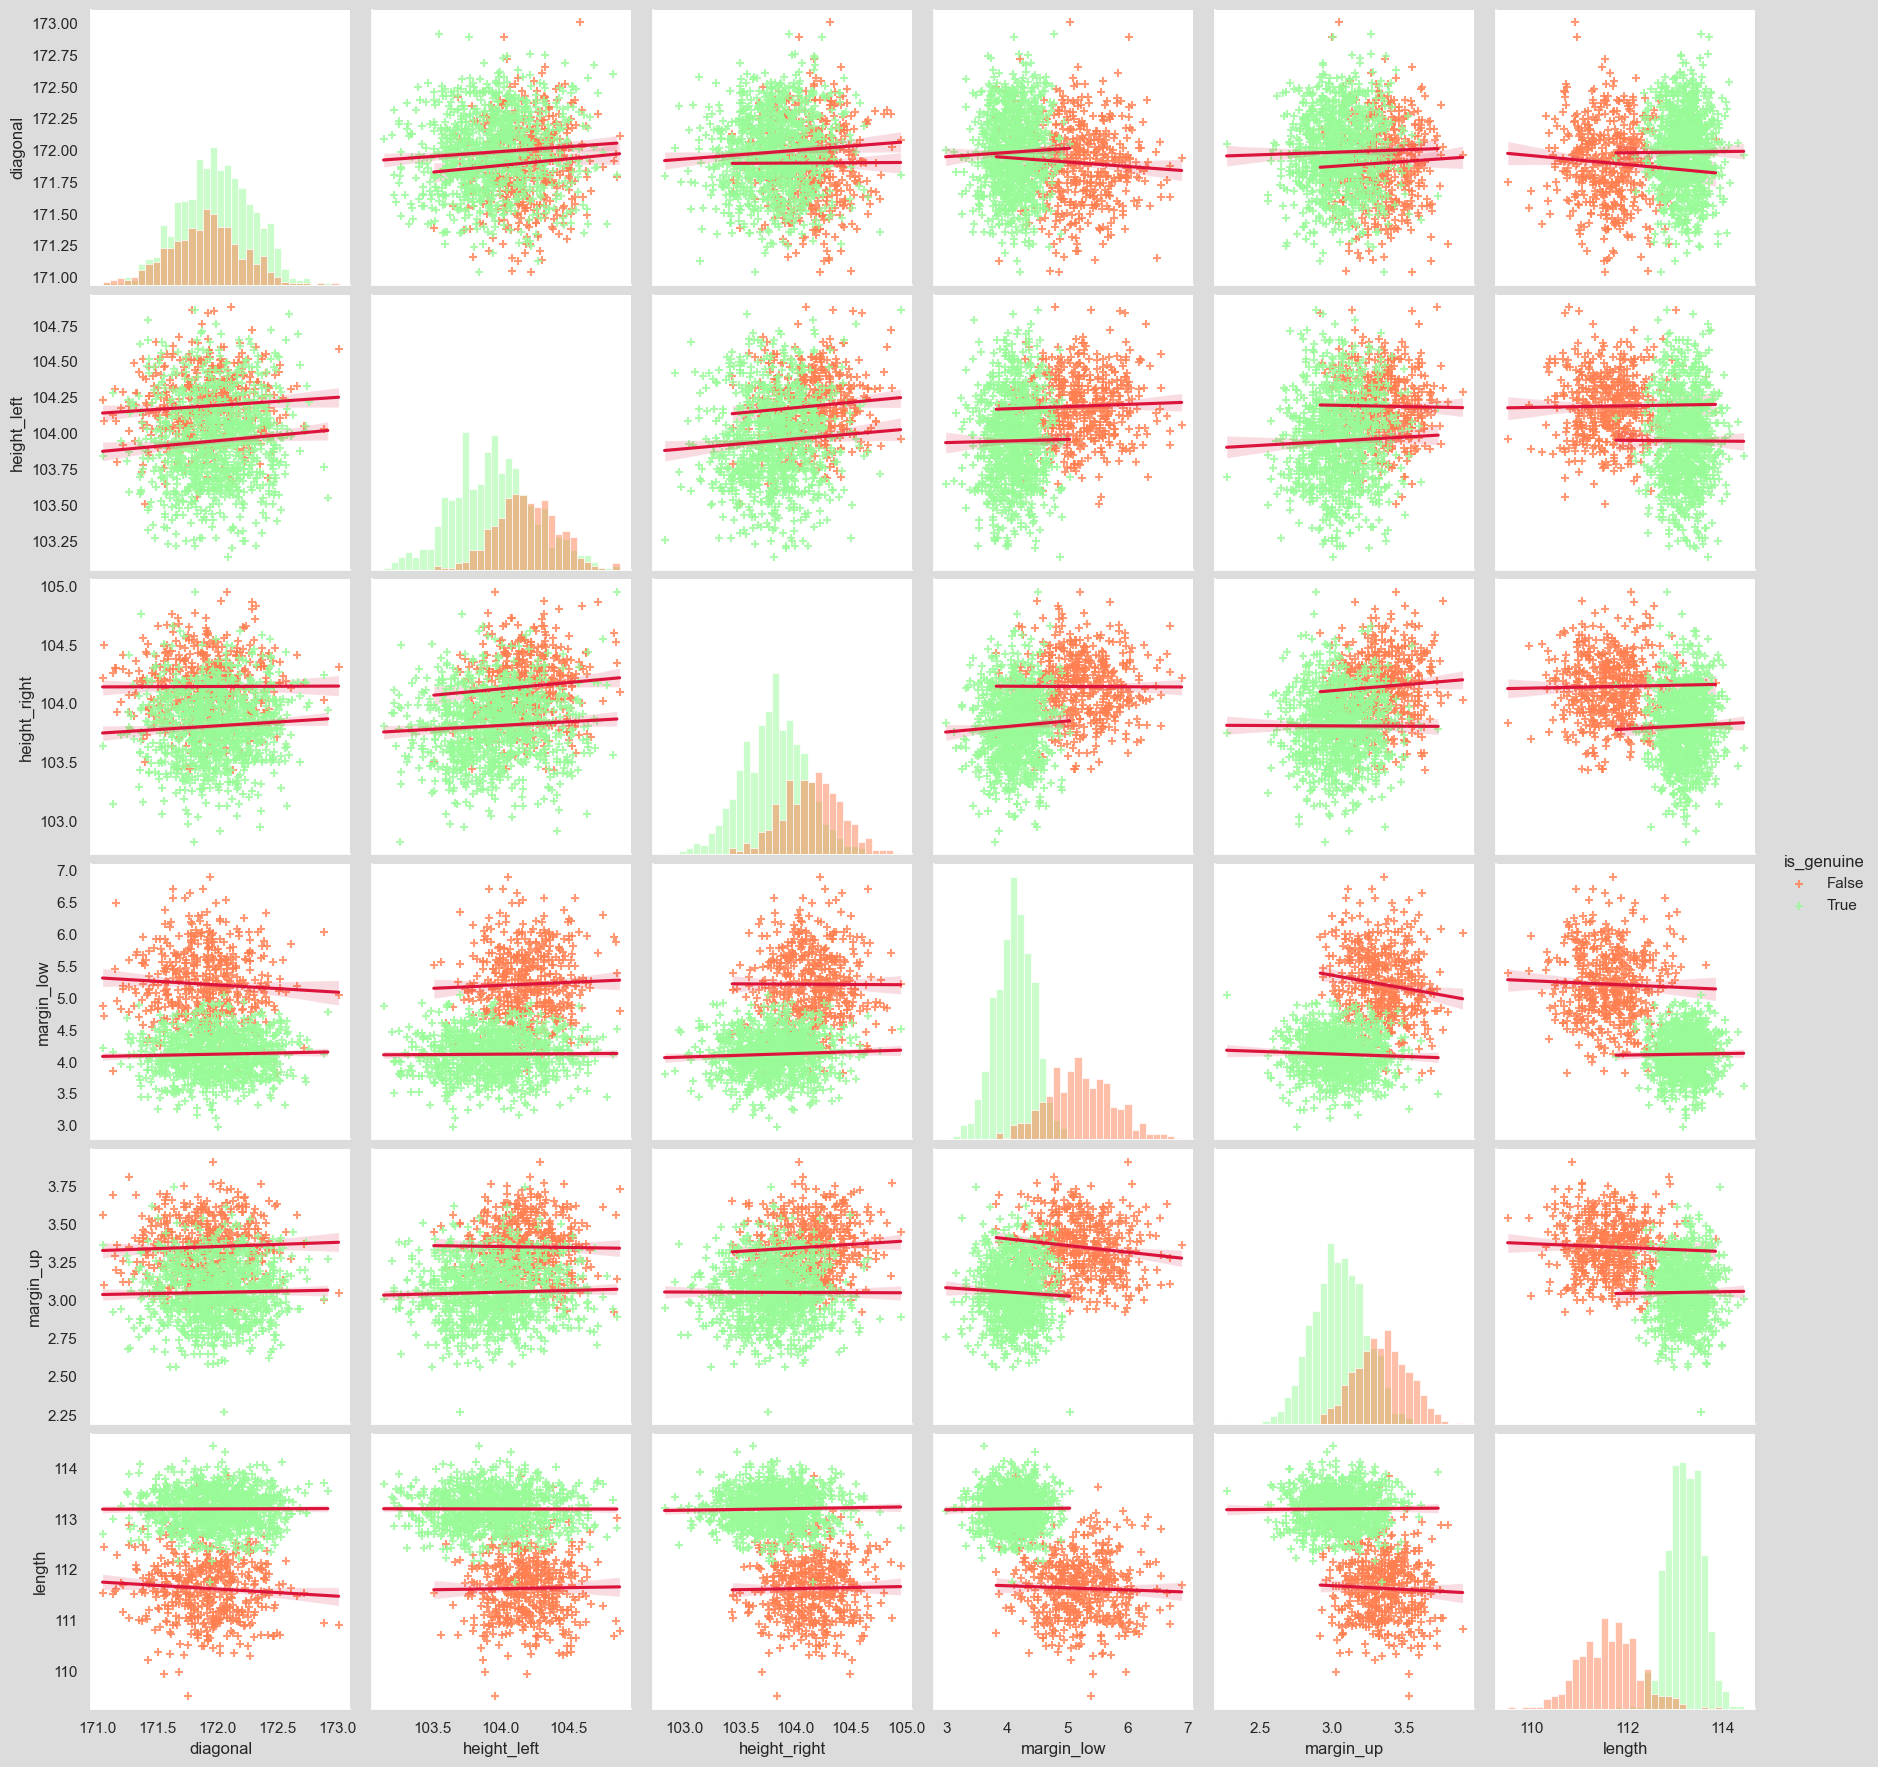

In [64]:
# visualise data correlations with a pairplot
billets_pairs = sns.pairplot(billets_final, kind='reg', height=3, diag_kind='hist', markers="+", hue='is_genuine',
                             palette=['coral','palegreen'], plot_kws={'line_kws':{'color':'crimson'}},
                             diag_kws={'bins':33})
plt.legend('', frameon=False)
plt.savefig("billets_final_pairplot.png")
plt.show()

## 5 - Representations graphiques de la distribution des donnees

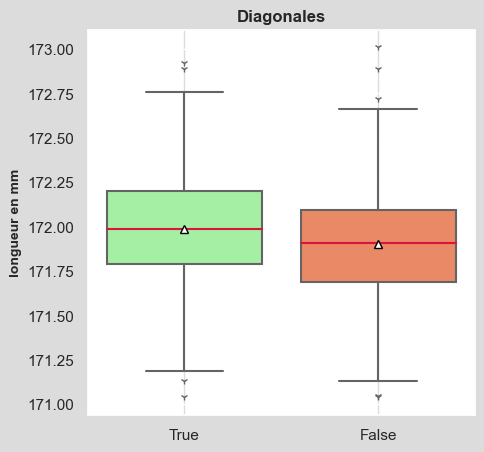

In [65]:
# analyse diagonals with a box plot
sns.set(rc={'figure.figsize':(5, 5),'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph1_diag = sns.boxplot(data=billets_final, y='diagonal', x='is_genuine', hue='is_genuine',
                     flierprops={"marker":"1"}, medianprops={"color":'crimson'},
                     meanprops={"markerfacecolor":"white", "markeredgecolor":'black'},
                     orient="v", palette=['coral', 'palegreen'], showmeans=True, dodge=False, order=[True, False])
plt.xlabel('')
plt.ylabel("longueur en mm", fontweight='bold', fontsize=10)
plt.title("Diagonales", fontweight='bold', fontsize=12)
plt.legend('', frameon=False)
plt.grid(axis='x', color='gainsboro')
plt.savefig("boxplot_diagonal.png", bbox_inches='tight')
plt.show()

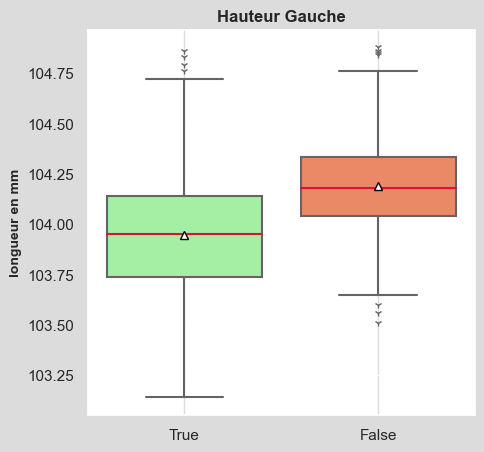

In [66]:
# analyse height_left with a box plot
sns.set(rc={'figure.figsize':(5, 5),'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph1_hl = sns.boxplot(data=billets_final, y='height_left', x='is_genuine', hue='is_genuine',
                     flierprops={"marker":"1"}, medianprops={"color":'crimson'},
                     meanprops={"markerfacecolor":"white", "markeredgecolor":'black'},
                     orient="v", palette=['coral', 'palegreen'], showmeans=True, dodge=False, order=[True, False])
plt.xlabel('')
plt.ylabel("longueur en mm", fontweight='bold', fontsize=10)
plt.title("Hauteur Gauche", fontweight='bold', fontsize=12)
plt.legend('', frameon=False)
plt.grid(axis='x', color='gainsboro')
plt.savefig("boxplot_height_left.png", bbox_inches='tight')
plt.show()

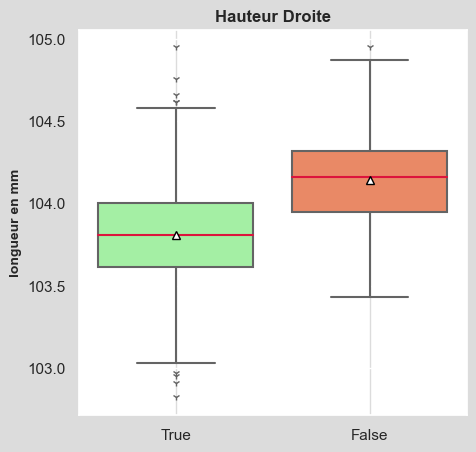

In [67]:
# analyse height_right with a box plot
sns.set(rc={'figure.figsize':(5, 5),'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph1_hr = sns.boxplot(data=billets_final, y='height_right', x='is_genuine', hue='is_genuine',
                     flierprops={"marker": "1"}, medianprops={"color" : 'crimson'},
                     meanprops={"markerfacecolor":"white", "markeredgecolor":'black'},
                     orient="v", palette=['coral', 'palegreen'], showmeans=True, dodge=False, order=[True, False])
plt.xlabel('')
plt.ylabel("longueur en mm", fontweight='bold', fontsize=10)
plt.title("Hauteur Droite", fontweight='bold', fontsize=12)
plt.legend('', frameon=False)
plt.grid(axis='x', color='gainsboro')
plt.savefig("boxplot_height_right.png", bbox_inches='tight')
plt.show()

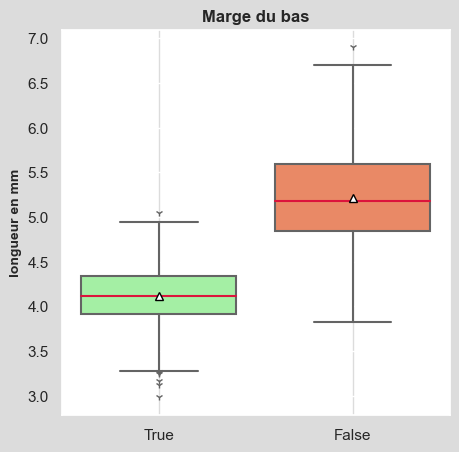

In [68]:
# analyse margin_low with a box plot
sns.set(rc={'figure.figsize':(5, 5),'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph1_ml = sns.boxplot(data=billets_final, y='margin_low', x='is_genuine', hue='is_genuine',
                     flierprops={"marker":"1"}, medianprops={"color":'crimson'},
                     meanprops={"markerfacecolor":"white", "markeredgecolor":'black'},
                     orient="v", palette=['coral', 'palegreen'], showmeans=True, dodge=False, order=[True, False])
plt.xlabel('')
plt.ylabel("longueur en mm", fontweight='bold', fontsize=10)
plt.title("Marge du bas", fontweight='bold', fontsize=12)
plt.legend('', frameon=False)
plt.grid(axis='x', color='gainsboro')
plt.savefig("boxplot_margin_low.png", bbox_inches='tight')
plt.show()

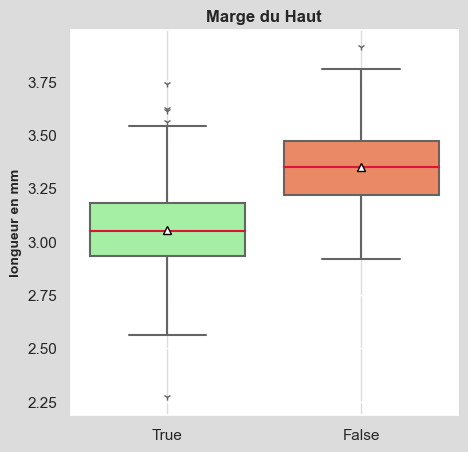

In [69]:
# analyse margin_up with a box plot
sns.set(rc={'figure.figsize':(5, 5),'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph1_mu = sns.boxplot(data=billets_final, y='margin_up', x='is_genuine', hue='is_genuine',
                     flierprops={"marker":"1"}, medianprops={"color":'crimson'},
                     meanprops={"markerfacecolor":"white", "markeredgecolor":'black'},
                     orient="v", palette=['coral', 'palegreen'], showmeans=True, dodge=False, order=[True, False])
plt.xlabel('')
plt.ylabel("longueur en mm", fontweight='bold', fontsize=10)
plt.title("Marge du Haut", fontweight='bold', fontsize=12)
plt.legend('', frameon=False)
plt.grid(axis='x', color='gainsboro')
plt.savefig("boxplot_margin_up.png", bbox_inches='tight')
plt.show()

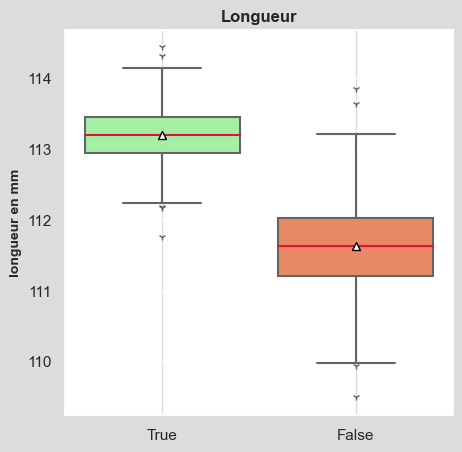

In [70]:
# analyse length with a box plot
sns.set(rc={'figure.figsize':(5, 5),'axes.facecolor':'white', 'figure.facecolor':'gainsboro'})
graph1_long = sns.boxplot(data=billets_final, y='length', x='is_genuine', hue='is_genuine',
                     flierprops={"marker":"1"}, medianprops={"color":'crimson'},
                     meanprops={"markerfacecolor":"white", "markeredgecolor":'black'},
                     orient="v", palette=['coral', 'palegreen'], showmeans=True, dodge=False, order=[True, False])
plt.xlabel('')
plt.ylabel("longueur en mm", fontweight='bold', fontsize=10)
plt.title("Longueur", fontweight='bold', fontsize=12)
plt.legend('', frameon=False)
plt.grid(axis='x', color='gainsboro')
plt.savefig("boxplot_length.png", bbox_inches='tight')
plt.show()

#### Les caracteristiques des vrais et faux billets sont nettement differentes sauf pour la longueur de la diagonale, ou la difference est moins marquee. Les outliers etant relativement proches des moustaches, nous les considererons comme des valeurs atypiques (et non aberrantes) et nous les conserverons pour la suite de l'analyse.